# SLU11: Model Validation
---

# 1 Introduction

One way to understand overfitting is by decomposing the generalization error of a model into bias and variance.

We will be using data about craft beer to try to predict whether a particular beer is an [India Pale Ale (IPA)](https://en.wikipedia.org/wiki/India_pale_ale).

The data was preprocessed in advance, as the original dataset was simplified and manipulated for teaching purposes. There are two features:
* `IBU`, which stands for International Bitterness Units and is a measure of bitterness
* `Color`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/beer.csv')
data.head(n=3)

,Color,IBU,IsIPA
0,-0.652164,-0.970233,0
1,-0.377297,1.387356,1
2,0.183752,0.442296,0


# 2 Bias-variance tradeoff

## 2.1 The critical role of assumptions

In machine learning, unlike other optimization problems, the function *f* we want to optimize is unknown to us - we have to *learn* it.

All we have are inputs *X* and outputs *y*, and a big black box in the middle:

![black_box](assets/black_box.png)

*Fig 1: In machine learning, we come up a hypothesis and fine tune it using known X and y values to build an accurate model*

We use (in fact, we *choose*) a hypothesis *h* to approximate the target function *f* (that maps the input X to the output *y*), given a set of parameters:

$$ \hat{y} = h_\Theta(X) $$

The hypothesis makes the target function *f* learnable by making assumptions about its *form* to simplify reality, such as this (well-known) one:

$$ h_\Theta(X) = \theta_0 + \theta_1x_1 + \space ... \space + \theta_ix_i $$

Parameters give our hypothesis flexibility and adaptability, but less underlying structure. They are *trained* to minimize how wrong the model is, given the data:

$$ min \space J(\Theta) = - \frac{1}{m} \sum\limits_{i=1}^m \mathcal{L}(h_\Theta(X^{(i)}), y^{(i)}) $$

Training is limited by the underlying assumptions: there is no single model that works best for every problem, regardless of the amount of data.

Let's start by isolating our features *X* and our target variable *y*.

In [2]:
X = data.copy()
y = X.pop('IsIPA')

## 2.2 The need for validation

Given the above, we need to validate our models after training, to know if they are any good:
1. Our assumptions may not hold (that is, we trained a garbage model) or there may be better models
2. We may be learning parameters that don't generalize for the entire population (i.e., statistical noise).

Remember, our goal is to approximate the true, universal target function *f* and we need our model to generalize to unseen data.

## 2.3 Decomposing the generalization error

Bias-variance decomposition is a way of analyzing an algorithm's expected generalization error, with respect to the sum of three terms:

1. Bias
2. Variance
3. Irreducible error.

As we will see, dealing with bias and variance is really about under- (high bias) and over-fitting (high variance).

![dart_throwing_bias_var_tradeoff](assets/dart_throwing_bias_var_tradeoff.png)

*Fig. 2: Graphical illustration of bias and variance using dart-throwing, from [Scott Fortmann-Row's "Understanding the Bias-Variance Trade-off"](http://scott.fortmann-roe.com/docs/BiasVariance.html)*

### 2.2.1 Bias and underfitting

Bias results from simplistic assumptions and a lack of malleability: in short, we are missing parameters that would be in a correct model.

Bias is always learning the same wrong thing, skewing predictions consistently across different training samples (i.e., far-off from the real value):

$$ Bias = \big(E[\hat{y}^{(i)}] - y^{(i)}\big)^2 $$

Fixing bias requires adding complexity to our models to make them more adaptable to the data. 

### 2.2.2 Variance and overfitting

On the other side, extremely flexible models overreact to the specifics of the training data (including the random noise).

Variance creeps in when we have more parameters than justified by the data and learn random things from different training samples:

$$ Variance = E\Big[\big(\hat{y}^{(i)} - E[\hat{y}^{(i)}]\big)^2\Big] $$

Fixing variance requires decreasing complexity to prevent the model from drifting.
 
### 2.2.3 The bias-variance tradeoff explained

There would be no tradeoff if we knew the perfect hypothesis in advance and had unlimited data to learn the parameters from.

In reality, there is an explicit trade-off between the two and bias is reduced and variance is increased in relation to model complexity.

![bias_variance_trade_off](assets/bias_variance_trade_off.png)

*Fig. 3: The bias-variance tradeoff, bias is reduced and variance is increased in relation to model complexity*

By complexity we mean, among others, adding new features, increasing the polynomial degree of the hypothesis or using highly flexible models.

In theory, we reach the right level of complexity when the increase in bias is equivalent to the reduction in variance:

$$ \frac{dBias}{dComplexity} = - \frac{dVariance}{dComplexity} $$

In practice, *there is not an analytical way to find this location* and the more we (over)reach for signal, the greater the noise.

### 2.2.4 Code, at last!

Below are different classifiers that perform differently in terms of bias and variance:
1. Logistic Regression
2. k-Nearest Neighbors with k=1
3. k-Nearest Neighbors with k=0

**Logistic Regression (high-bias)**

Logistic regression provides an example of bias because it makes a lot of assumptions about the form of the target function.

Visually, we can understand the model's inability to adjust to a non-linear decision boundary, structurally enforcing a linear one instead.

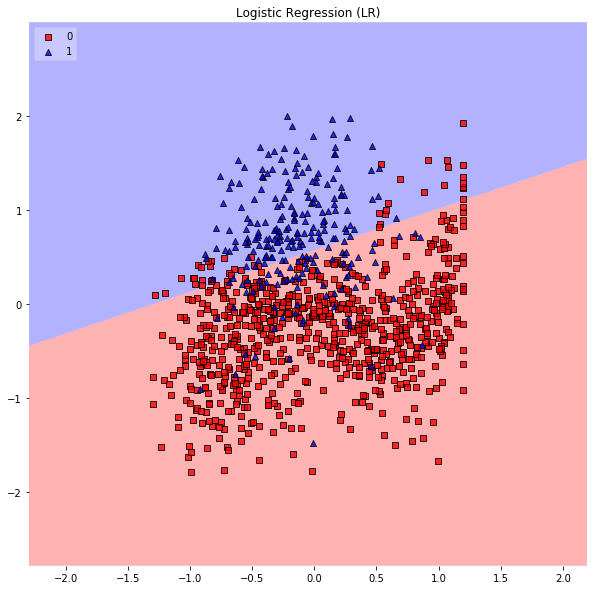

In [3]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)
plt.figure(figsize=(10,10))
plot_decision_regions(X.values, y.values, clf=lr, legend=2)
plt.title("Logistic Regression (LR)")
plt.show()

**k-Nearest Neighbors with k=1 (high-variance)**

On the other side, the k-Nearest neighbors algorithm provides great flexibility and minimum underlying structure.

The small blue *pockets* or *islands* show that our model is overadapting to the training data and, most probably, fitting to noise.

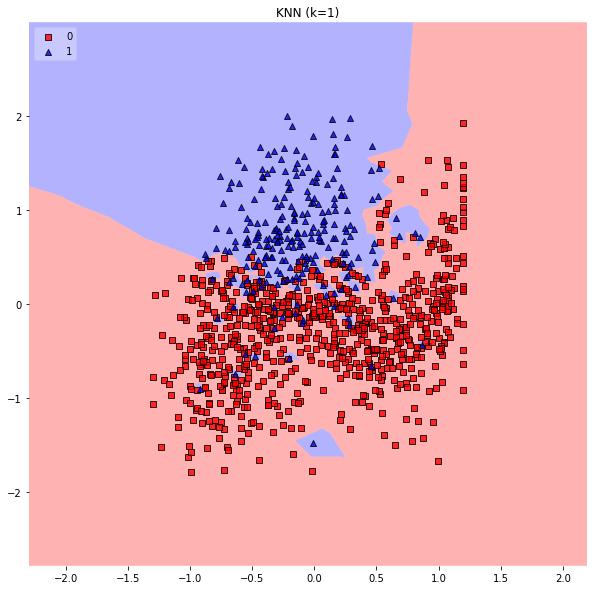

In [4]:
from sklearn.neighbors import KNeighborsClassifier
   
knn_k1 = KNeighborsClassifier(n_neighbors=1)
knn_k1.fit(X, y)
plt.figure(figsize=(10,10))
plot_decision_regions(X.values, y.values, clf=knn_k1, legend=2)
plt.title("KNN (k=1)")
plt.show()

**K-Nearest Neighbors with k=9 (sort of better)**

A key part of the k-NN algorithm is the choice of *k*: the number of nearest numbers in which to base the prediction.

Increasing *k* results in considering more observations in each prediction and makes the model more rigid, for good effect.

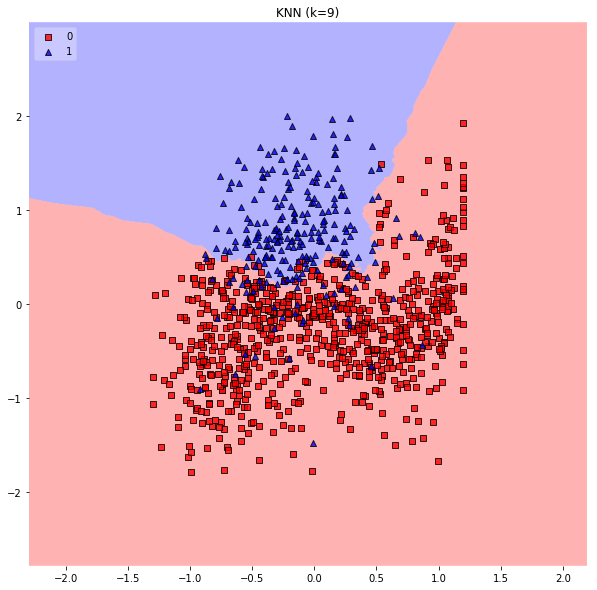

In [5]:
knn_k9 = KNeighborsClassifier(n_neighbors=9)
knn_k9.fit(X, y)
plt.figure(figsize=(10,10))
plot_decision_regions(X.values, y.values, clf=knn_k9, legend=2)
plt.title("KNN (k=9)")
plt.show()

Comparing different models by plotting decision boundaries, however, is not very scientific, especially at higher dimensions.

There must be a better way!

## 3 Performing model validation

The first thing we will do is creating a dictionary with our classifiers, for convenience.

In [6]:
clfs = {'LR': LogisticRegression(),
        'KNN k=9': KNeighborsClassifier(n_neighbors=9),
        'KNN k=1': KNeighborsClassifier(n_neighbors=1)}

### 3.1 In-sample-error (ISE) or training error

The in-sample-error is how well our model performs on the training data.

We will measure the error rate for each model in the simplest way, by computing the fractions of misclassified cases.

In [7]:
from sklearn.metrics import accuracy_score

def classification_error(clf, X, y):
    y_pred = clf.predict(X)
    error_rate = 1 - accuracy_score(y, y_pred)
    return round(error_rate * 100, 2)

Testing our model's performance on the training data is a common mistake and underestimates the generalization error.

In [8]:
for key, clf in clfs.items():
    clf.fit(X, y)
    training_error = classification_error(clf, X, y)
    print('---\n{} error:\nTrain: {}%'.format(key, training_error))

---
LR error:
Train: 12.0%
---
KNN k=9 error:
Train: 6.8%
---
KNN k=1 error:
Train: 0.0%


### 3.2 Out-of-sample error (OSE) or testing error

The out-of-sample error measures how well the model performs on previsouly on unseen data and if it's picking up patterns that generalize well.

Ideally, both training and test errors are low and close to one another.

*Underfitted* models tend to perform poorly on both train and test data, having large (and similar) in-sample- and out-of-sample errors.

*Overfitting* is detected when a model that performs on training data but not quite so well in the test set: the bigger the gap, the great*er the overfitting.

![train_test_error](assets/train_test_error.png)

*Fig 4: How training and test errors behave in regards to model complexity, bias and variance*

There are different techniques to measure the testing error, we will focus on:
1. Train-test split
2. Validation set
3. Cross-validation
4. Bootstrapping.

### 3.2.1 Train-test split (aka holdout method)

The best possible solution is to leave a random subset of the data aside from the beginning to test our final model at the end.

![test_set](assets/test_set.png)

*Fig 5: Test set illustrated, you holdout a significant chunk of the data for testing your model in the end*

We must keep the test data aside for the entire modelling process, otherwise knowledge about the test set will *leak* into the model and ruin the experiment.

![train_test_set](assets/train_test_split.png)

*Fig 5: Workflow with test and training sets*

After evaluation, relearn your final model on the whole data.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print("---\nNumber of observations:\nTrain: {} | Test: {}".format(X_train.shape[0], X_test.shape[0]))

---
Number of observations:
Train: 600 | Test: 400


In [10]:
def compute_metrics(X_train, y_train, X_test, y_test, clf):
    training_error = classification_error(clf, X_train, y_train)
    test_error = classification_error(clf, X_test, y_test)
    return training_error, test_error

for key, clf in clfs.items():
    clf.fit(X_train, y_train)
    training_error, test_error = compute_metrics(X_train, y_train, X_test, y_test, clf)
    print('---\n{} error:\nTrain: {:5}% | Test: {}%'.format(key, training_error, test_error))

---
LR error:
Train:  13.5% | Test: 9.5%
---
KNN k=9 error:
Train:  7.33% | Test: 7.0%
---
KNN k=1 error:
Train:   0.0% | Test: 10.75%


### 3.2.2 Validation set

Given we have enough data, we can create a *validation dataset*.

![validation_set](assets/validation_set.png)

*Fig. 6: Validation set as compared with the holdout approach*

![validation_split](assets/validation_split.png)

*Fig. 7: Workflow with test, validation and training sets*

In [11]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)
del X_temp, y_temp

print("Number of observations:\nTrain: {} | Test: {} | Validation: {}".format(X_train.shape[0], X_test.shape[0], X_val.shape[0]))

Number of observations:
Train: 600 | Test: 200 | Validation: 200


In [12]:
def compute_validation_metrics(X_train, y_train, X_test, y_test, X_validation, y_validation, clf):
    training_error, test_error = compute_metrics(X_train, y_train, X_test, y_test, clf)
    validation_error = classification_error(clf, X_validation, y_validation)
    return training_error, test_error, validation_error

for key, clf in clfs.items():
    clf.fit(X_train, y_train)
    training_error, test_error, validation_error = compute_validation_metrics(X_train, y_train, X_test, y_test, X_val, y_val, clf)
    print('---\n{} error:\nTrain: {:5}% | Validation: {:4}% | Test: {:4}%'.format(key, training_error, validation_error, test_error))

---
LR error:
Train: 11.33% | Validation: 13.0% | Test: 11.0%
---
KNN k=9 error:
Train:  6.83% | Validation:  7.5% | Test:  9.5%
---
KNN k=1 error:
Train:   0.0% | Validation: 13.0% | Test: 10.0%


### 3.2.3 k-Fold Cross-validation

Test error results can be subject to great variability, especially for smaller datasets, depending on how we split the data (i.e., which observations go where).

Also, and quite obviously, holding out *more* data reduces the amount available for training, possibly leading us to *overestimate* the test error.

In *k*-fold cross validation:
1. The original sample is randomly partitioned into *k* equal sized parts, or subsamples
2. Each time, we leave out part *k*, fit the model to the other *k*-1 subsets combined in a single dataset, and then test the model against the left out *k*th part
3. This is done for each *k* = 1, 2, ..., *K*, and then the results are combined, using, for example, the mean error.

![cross_validation](assets/cross_validation.png)

*Fig 8: Creating multiple (K=5) train and test set pairs using cross-validation*

This way, we use every observation to both train and test out model: each fold is used once as validation, while the *k*-1 remaining folds form the training set.

In [13]:
from sklearn.model_selection import cross_val_score

for key, clf in clfs.items():
    scores = cross_val_score(clf, X, y, cv=10, scoring=classification_error)
    mean_error = round(np.mean(scores), 2)
    var_error = round(np.var(scores), 2)
    print('---\n{} validation error:\nMean: {:5}% | Variance: {:4}'.format(key, mean_error, var_error))

---
LR validation error:
Mean: 11.98% | Variance: 5.82
---
KNN k=9 validation error:
Mean:  7.99% | Variance: 9.57
---
KNN k=1 validation error:
Mean: 11.88% | Variance: 11.87


Nonetheless, since each training set contains part of the data, the estimated test error can, still, be biased upward.

### 3.2.4 Bootstrapping

Bootstraping consists of repeatedly sampling observations from the original data, with replacement, to create multiple bootstrap datasets with the same size *n* as the original dataset.

We will use `np.random.choice()` to generate a random sample, with replacement, of * n* rows.

In [14]:
np.random.choice([1, 2, 3, 4, 5], size=5, replace=True)

array([5, 3, 1, 4, 1])

In [15]:
def create_bootstrap_dataset(X, y):
    n = X.shape[0]
    train_obs = np.random.choice(X.index, size=n, replace=True)
    return X.loc[train_obs], y.loc[train_obs]

Now, we will to generate many bootstrap datasets.

In [16]:
def bootstrap(X, y, n_datasets=1000):
    datasets = {}
    for i in range(0, n_datasets):
        X_z, y_z = create_bootstrap_dataset(X, y)
        dataset = {'X': X_z, 'y': y_z}
        z = len(datasets)
        datasets.update({z: dataset})
    return datasets
        
datasets = bootstrap(X, y)

We can train our model using our bootstrap datasets, and test it against the original dataset.

In [17]:
results = {}
for name, clf in clfs.items():
    results[name] = {}
    for key, dataset in datasets.items():
        X_train, y_train = dataset['X'], dataset['y']
        X_test, y_test = X.drop(X_train.index), y.drop(y_train.index)
        clf.fit(X_train, y_train)
        training_error, test_error = compute_metrics(X_train, y_train, X_test, y_test, clf)
        results[name].update({key: test_error})

Finally, we generate a distribution of the generalization error.

---
LR validation error:
Mean: 11.84% | Variance: 1.78
---
KNN k=9 validation error:
Mean:  8.65% | Variance: 1.67
---
KNN k=1 validation error:
Mean: 11.96% | Variance: 1.72


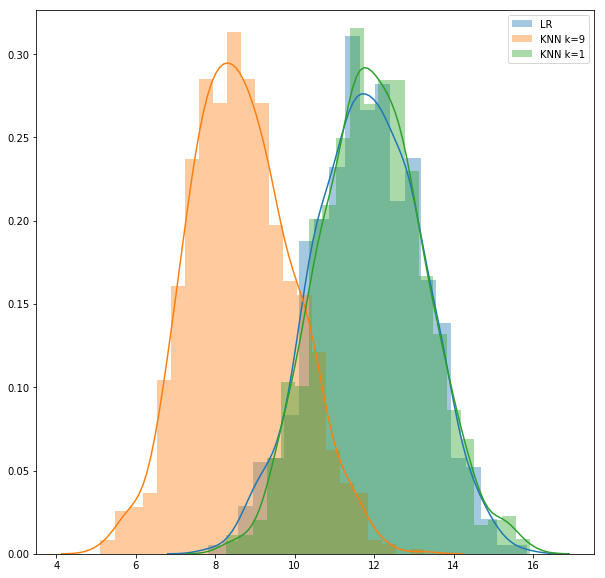

In [18]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,10))

for key, result in results.items():
    prediction_errors = list(result.values())
    mean_error = round(np.mean(prediction_errors), 2)
    var_error = round(np.var(prediction_errors), 2)
    sns.distplot(prediction_errors, label=key)
    print('---\n{} validation error:\nMean: {:5}% | Variance: {:4}'.format(key, mean_error, var_error))

plt.legend(loc=0)
plt.show()